In [119]:
import os
import json


import matplotlib.pyplot as plt
import matplotlib.patches as patch
%matplotlib inline


import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams["figure.dpi"] = 300

import pandas as pd
import numpy as np

In [93]:
import dask.dataframe as dd

# Loading data and preprocessing

In [15]:
path = "/Users/JasonLiu/dump/predicted/"
files = os.listdir(path)

In [26]:
df = pd.concat(map(pd.read_csv, [path+file for file in files]))

In [27]:
%%time
df["time"] = pd.to_datetime(df.time)

CPU times: user 9.15 s, sys: 86.1 ms, total: 9.23 s
Wall time: 9.38 s


In [28]:
%%time
df = df.set_index("time")

CPU times: user 688 ms, sys: 208 ms, total: 896 ms
Wall time: 906 ms


In [86]:
df["fp"] = df["prediction_alcohol_svc"] * df["prediction_firstperson_svc"]

In [160]:
df = df["2015-12-28":]

In [161]:
col = ["prediction_firstperson_level_0", "prediction_firstperson_level_2", "prediction_firstperson_level_3"]
new_fp_cols = ["casual", "looking", "reflecting"]
for new_name, old_name in zip(new_fp_cols, col):
    df[new_name] = df[old_name] * df.prediction_alcohol_svc * df.prediction_firstperson_svc

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [165]:
new_years_levels = df.groupby([df.index.year, df.index.day, df.index.hour]).agg({_:"mean" for _ in new_fp_cols})

In [166]:
new_years_drinking = df.groupby([df.index.year, df.index.day, df.index.hour]).fp.mean()

In [175]:
new_years_drinking

2015  28  1     0.051415
          2     0.052375
          3     0.051033
          4     0.052129
          20    0.049490
          21    0.048139
          22    0.050226
          23    0.048473
      29  0     0.051743
          1     0.049837
          2     0.050273
          3     0.049945
          4     0.051467
          5     0.050883
          16    0.048417
          17    0.048909
          18    0.046936
          19    0.047225
          20    0.047825
          21    0.047760
          22    0.047294
          23    0.050256
      30  0     0.051808
          1     0.052165
          2     0.048660
          3     0.051227
          4     0.055118
          5     0.053693
          6     0.054741
          7     0.054680
                  ...   
2016  2   11    0.060021
          12    0.046780
          13    0.045496
          14    0.048843
          15    0.051904
          16    0.050654
          17    0.050245
          18    0.050681
          19    0.047243


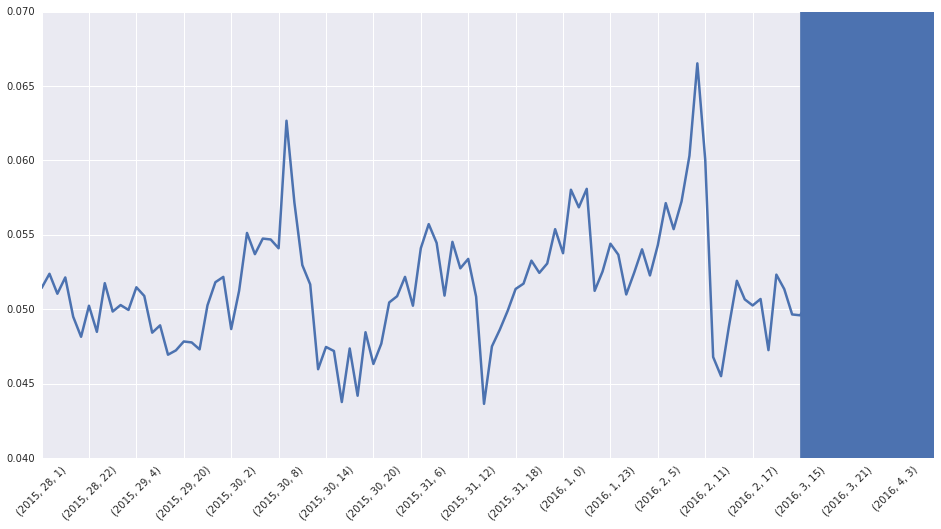

In [174]:
ax = new_years_drinking.plot()
ax.set_xticklabels(new_years_drinking.index[::6], rotation=45)
ax.set_xticks(list(range(len(list(new_years_drinking.index))))[::6])
ax.add_patch(patch.Rectangle((24*4,0), 100, 100))